# Introduction aux donn√©es spatiales avec Geopandas

Lino Galiana  
2025-10-07

<div class="badge-container"><div class="badge-text">Pour essayer les exemples pr√©sents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/03_geopandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=¬´03_geopandas_intro¬ª&init.personalInit=¬´https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh¬ª&init.personalInitArgs=¬´manipulation%2003_geopandas_intro%20correction¬ª" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=¬´03_geopandas_intro¬ª&init.personalInit=¬´https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh¬ª&init.personalInitArgs=¬´manipulation%2003_geopandas_intro%20correction¬ª" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/manipulation/03_geopandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **Note**
>
> Ceci est la version fran√ßaise üá´üá∑ de ce chapitre, pour voir la version anglaise allez <a href="/home/runner/work/python-datascientist/python-datascientist/en/content/manipulation/03_geopandas_intro.qmd">ici</a>.

> **Comp√©tences √† l‚Äôissue de ce chapitre**
>
> -   Conna√Ætre les structures de donn√©es centrales de **GeoPandas** : `GeoSeries` et `GeoDataFrame`, extensions respectives de `pandas.Series` et `pandas.DataFrame` pour g√©rer des g√©om√©tries spatiales ;
> -   Lire des donn√©es g√©ospatiales depuis des fichiers vari√©s (GeoPackage, Shapefile, GeoJSON‚Ä¶) avec la m√©thode `.read_file()` ;
> -   Appliquer les m√©thodes standard de `pandas` sur un `GeoDataFrame`, notamment `head()` pour explorer les donn√©es tout en conservant les g√©om√©tries ;
> -   Visualiser facilement des donn√©es g√©ospatiales avec la m√©thode `.plot()` int√©gr√©e, pour cr√©er rapidement des cartes statiques ;
> -   Comprendre et manipuler les syst√®mes de projection : d√©finir un CRS avec `set_crs` et reprojeter les donn√©es avec `to_crs`.

# 1. Introduction

## 1.1 Quelle diff√©rence avec des donn√©es traditionnelles ?

Les chapitres pr√©c√©dents ont permis de d√©couvrir la mani√®re
dont des donn√©es structur√©es peuvent √™tre valoris√©es
gr√¢ce √† la librairie `Pandas`. Nous allons maintenant d√©couvrir l‚Äôanalyse
de donn√©es plus complexes, √† savoir les donn√©es spatiales.
Ces
derni√®res sont une sophistication des donn√©es tabulaires puisqu‚Äôen plus
de partager les propri√©t√©s de celles-ci (donn√©es aplaties dans une structure de colonnes et de lignes), elles comportent une dimension g√©ographique suppl√©mentaire. Celle-ci est plus ou moins complexe selon la nature des donn√©es: cela peut √™tre des points (coordonn√©es de localisation en deux dimensions), des lignes (une suite de points), des lignes directionnelles (la m√™me structure pr√©c√©demment mais avec une direction), des polygones (un ensemble de points)‚Ä¶ Cette diversit√© des objets g√©ographiques vise √† permettre des syst√®mes d‚Äôinformation et de repr√©sentation de nombreux objets g√©ographiques.

Par la suite, nous entendrons par *‚Äúdonn√©es spatiales‚Äù* l‚Äôensemble des donn√©es qui portent sur les caract√©ristiques g√©ographiques des objets (localisation, contours, liens).
Les caract√©ristiques g√©ographiques des objets sont d√©crites √† l‚Äôaide d‚Äôun **syst√®me de coordonn√©es**. Celles-ci
permettent de repr√©senter l‚Äôobjet g√©ographique dans un espace euclidien √† deux dimensions $(x,y)$.
Le passage de l‚Äôespace r√©el (la Terre, qui est une sph√®re en trois dimensions) √† l‚Äôespace plan
se fait gr√¢ce √† un **syst√®me de projection**.

## 1.2 Structure des donn√©es spatiales

Les donn√©es spatiales rassemblent classiquement deux types de donn√©es :

1.  des **donn√©es g√©ographiques** (ou g√©om√©tries) : objets g√©om√©triques tels que des points, des vecteurs, des polygones, ou des maillages (*raster*). Exemple: la forme de chaque commune, les coordonn√©es d‚Äôun b√¢timent;
2.  des **donn√©es attributaires** (ou attributs) : des mesures et des caract√©ristiques associ√©es aux objets g√©om√©triques. Exemple: la population de chaque commune, le nombre de fen√™tres et le nombre d‚Äô√©tages d‚Äôun b√¢timent.

**Les donn√©es spatiales sont fr√©quemment trait√©es √† l‚Äôaide d‚Äôun syst√®me d‚Äôinformation g√©ographique (SIG)**, c‚Äôest-√†-dire un syst√®me d‚Äôinformation capable de stocker, d‚Äôorganiser et de pr√©senter des donn√©es alphanum√©riques spatialement r√©f√©renc√©es par des coordonn√©es dans un syst√®me de r√©f√©rence (CRS). `Python` dispose de fonctionnalit√©s lui permettant de r√©aliser les m√™mes t√¢ches qu‚Äôun SIG (traitement de donn√©es spatiales, repr√©sentations cartographiques).

## 1.3 Les donn√©es spatiales sont incontournables

D‚Äôun usage initialement essentiellement militaire ou administratif, la production cartographique est, depuis au moins le XIXe si√®cle, tr√®s fr√©quente
pour repr√©senter de l‚Äôinformation socio√©conomique. La repr√©sentation la plus connue dans ce domaine
est la carte par aplat de couleur, dite carte choropl√®the[1].

D‚Äôapr√®s Chen et al. (2008), la premi√®re repr√©sentation de ce type
a √©t√© propos√©e par Charles Dupin en 1926
pour repr√©senter les niveaux d‚Äôinstruction sur le territoire fran√ßais.
L‚Äô√©mergence des cartes choropl√®thes est en effet indissociable
de l‚Äôorganisation du pouvoir sous forme d‚Äôentit√©s pens√©es
politiques suppos√©es unitaires:
les cartes du monde repr√©sentent souvent des aplats de couleurs √† partir
des nations, les cartes nationales √† partir d‚Äô√©chelons administratifs
(r√©gions, d√©partements, communes, mais aussi Etats ou *landers*).

![La premi√®re carte choropl√®thes par Dupin (1826)](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg/800px-Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg).

Si la production d‚Äôinformation g√©ographique a pu √™tre tr√®s li√©e √† un usage militaire puis √† la gestion administrative d‚Äôun territoire, la
num√©risation de l‚Äô√©conomie ayant d√©multipli√©e les acteurs concern√©s par la collecte et la mise √† disposition de donn√©es g√©ographique, la manipulation et la repr√©sentation de donn√©es spatiales n‚Äôest plus l‚Äôapanage des g√©ographes et g√©omaticiens. Les *data scientists* doivent √™tre capables de rapidement explorer la structure d‚Äôun jeu de donn√©es g√©ographique comme ils le feraient d‚Äôun jeu de donn√©es tabulaires classiques.

## 1.4 O√π trouver la donn√©e spatiale fran√ßaise ?

Lors de notre p√©riple de d√©couverte de `Pandas`,
nous avons d√©j√† rencontr√© quelques sources g√©olocalis√©es,
notamment produites par l‚ÄôInsee. Cette institution publie
de nombreuses statistiques locales, par exemple les donn√©es
Filosofi que nous avons rencontr√©es au chapitre pr√©c√©dent. Au-del√†
de l‚ÄôInsee, l‚Äôensemble des institutions du syst√®me
statistique public (Insee et services statistiques minist√©riels)
publie de nombreuses sources de donn√©es agr√©g√©es √† diff√©rentes
mailles g√©ographiques: √† un niveau infracommunal (par exemple par [carreaux de 200m](https://www.insee.fr/fr/statistiques/6215138?sommaire=6215217)),
au niveau communal ou √† des niveaux supracommunaux (zonages administratifs ou zonages d‚Äô√©tudes).

Plus g√©n√©ralement, de nombreuses administrations fran√ßaises hors
du syst√®me statistique public diffusent des donn√©es
g√©ographiques sur [data.gouv](https://www.data.gouv.fr/fr/). Nous avons par exemple pr√©c√©demment exploit√© un jeu de donn√©es de l‚ÄôAdeme dont la dimension g√©ographique √©tait la commune.

L‚Äôacteur central de l‚Äô√©cosyst√®me public de la donn√©e g√©ographique est l‚Äô[IGN](https://www.ign.fr/). Bien connu des amateurs de randonn√©es pour ses cartes *‚ÄúTop 25‚Äù* qui peuvent √™tre retrouv√©es sur le [geoportail](https://www.geoportail.gouv.fr/carte), l‚ÄôIGN est √©galement en charge de la cartographie des limites l√©gales des entit√©s administratives fran√ßaises (base AdminExpress), des for√™ts (BDFor√™t), des routes (BDRoute), des b√¢timents (BDTopo), etc. Nous avons succinctement √©voqu√© la librairie [`cartiflette`](https://github.com/InseeFrLab/cartiflette) lors du chapitre pr√©c√©dent, qui permet de r√©cup√©rer les fonds de carte administratifs (base AdminExpress) de mani√®re flexible avec `Python` ; nous irons plus loin dans ce chapitre.

La puissance publique n‚Äôest plus l‚Äôunique acteur qui produit et diffuse de la donn√©e spatiale. La collecte de coordonn√©es GPS √©tant devenue presque automatique, de nombreux acteurs collectent, exploitent et m√™me revendent de la donn√©e spatiale sur leurs utilisateurs. Ces donn√©es peuvent √™tre tr√®s pr√©cises et tr√®s riches sur certaines probl√©matiques, par exemple sur les d√©placements. Il est n√©anmoins n√©cessaire d‚Äôavoir √† l‚Äôesprit lorsqu‚Äôon d√©sire
extrapoler des statistiques construites sur ces donn√©es que celles-ci concernent les utilisateurs du service en question, qui ne sont pas n√©cessairement repr√©sentatifs des comportements de la population dans son ensemble.

## 1.5 Objectifs de ce chapitre

Ce chapitre illustre √† partir d‚Äôexemples pratiques certains principes centraux de l‚Äôanalyse de donn√©es :

-   Manipulations sur les attributs des jeux de donn√©es ;
-   Manipulations g√©om√©triques ;
-   Gestion des projections cartographiques ;
-   Cr√©ation rapide de cartes (ce sera approfondi dans un prochain chapitre).

## 1.6 Donn√©es utilis√©es dans ce chapitre

Dans ce tutoriel, nous allons utiliser les donn√©es suivantes :

-   [Localisations des stations velib](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr) ;
-   [fonds de carte `AdminExpress`](https://geoservices.ign.fr/adminexpress) √†
    travers un package `Python` nomm√© [`cartiflette`](https://github.com/InseeFrLab/cartiflette)
    facilitant la r√©cup√©ration de cette source.

## 1.7 Installations pr√©alables

Ce tutoriel n√©cessite quelques installations de packages
pour pouvoir √™tre reproduit

[1] Despite all its limitations, which we will revisit, the choropleth map is nonetheless informative. Knowing how to produce one quickly to grasp the main structuring facts of a dataset is particularly useful.

In [ ]:
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
!pip install topojson

Pour √™tre en mesure d‚Äôex√©cuter ce tutoriel, les imports suivants
seront utiles.

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

> **Warning**
>
> Le package `cartiflette` est exp√©rimental
> et n‚Äôest disponible que sur
> [`Github`](https://github.com/InseeFrLab/cartogether), pas sur `PyPi`.
> Il est amen√© √† √©voluer rapidement et cette page sera mise √† jour
> quand de nouvelles fonctionalit√©s (notamment l‚Äôutilisation d‚Äô`API`)
> seront disponibles pour encore simplifier la r√©cup√©ration de
> contours g√©ographiques.

Pour installer `cartiflette`, il est n√©cessaire d‚Äôutiliser les commandes suivantes
depuis un `Jupyter Notebook` (si vous utilisez la ligne de commande directement,
vous pouvez retirer les `!` en d√©but de ligne):

In [ ]:
!pip install py7zr geopandas openpyxl tqdm s3fs --quiet
!pip install PyYAML xlrd --quiet
!pip install cartiflette --quiet

# 2. De `Pandas` √† `Geopandas`

Le *package* `Geopandas` est une bo√Æte √† outils con√ßue pour faciliter la manipulation de donn√©es spatiales. **La grande force de `Geopandas` est qu‚Äôil permet de manipuler des donn√©es spatiales comme s‚Äôil s‚Äôagissait de donn√©es traditionnelles**, car il repose sur le standard ISO 19125 [*simple feature access*](https://en.wikipedia.org/wiki/Simple_Features) d√©fini conjointement par l‚Äô*Open Geospatial Consortium (OGC)* et l‚Äô*International Organization for Standardization (ISO)*. `Geopandas` repose d‚Äôune part sur `Pandas` pour le traitement de la dimension tabulaire des donn√©es spatiales et d‚Äôautre part sur [`Shapely`](https://shapely.readthedocs.io/en/stable/manual.html) et [`GDAL`](https://gdal.org/index.html) pour les manipulations g√©om√©triques. N√©anmoins, comme `Pandas` permettait de faire du `Numpy` sans le savoir, lorsqu‚Äôon travaille avec `Geopandas` on repose sur les deux couches basses que sont `Shapely` et `GDAL` sans avoir √† s‚Äôemb√™ter.

Par rapport √† un *DataFrame* standard, un objet `Geopandas` comporte
une colonne suppl√©mentaire: `geometry`. Elle stocke les coordonn√©es des
objets g√©ographiques (ou ensemble de coordonn√©es s‚Äôagissant de contours). Un objet `Geopandas` h√©rite des propri√©t√©s d‚Äôun
*DataFrame* `Pandas` mais propose des m√©thodes adapt√©es au traitement des donn√©es spatiales. Par cons√©quent, gr√¢ce √† `GeoPandas`, on a des attributs qui reposent sur le principe de donn√©es *tidy* √©voqu√©es dans le [chapitre pr√©c√©dent](content/manipulation/02_pandas_intro.qmd) alors que la g√©om√©trie aff√©rante sera g√©r√©e de mani√®re coh√©rente en parall√®le des attributs.

Ainsi, gr√¢ce √† `Geopandas`, on pourra effectuer des manipulations sur les attributs des donn√©es comme avec `pandas` mais on pourra √©galement faire des manipulations sur la dimension spatiale des donn√©es. En particulier,

-   Calculer des distances et des surfaces ;
-   Agr√©ger rapidement des zonages (regrouper les communes en d√©partement par exemple) ;
-   Trouver dans quelle commune se trouve un b√¢timent √† partir de ses coordonn√©es g√©ographiques ;
-   Recalculer des coordonn√©es dans un autre syst√®me de projection ;
-   Faire une carte, rapidement et simplement.

> **Tip**
>
> Les manipulations de donn√©es sur un objet `Geopandas` sont nettement plus lentes que sur
> un `DataFrame` traditionnel (car `Python` doit g√©rer les informations g√©ographiques pendant la manipulation des donn√©es).
> Lorsque vous manipulez des donn√©es de grandes dimensions,
> il peut √™tre pr√©f√©rable d‚Äôeffectuer les op√©rations sur les donn√©es avant de joindre une g√©om√©trie √† celles-ci.

Par rapport √† un logiciel sp√©cialis√© comme `QGIS`, `Python` permettra
d‚Äôautomatiser le traitement et la repr√©sentation des donn√©es. D‚Äôailleurs,
`QGIS` utilise lui-m√™me `Python`‚Ä¶

## 2.1 Anatomie d‚Äôun objet `GeoPandas`

En r√©sum√©, un objet `GeoPandas` comporte les √©l√©ments suivants :

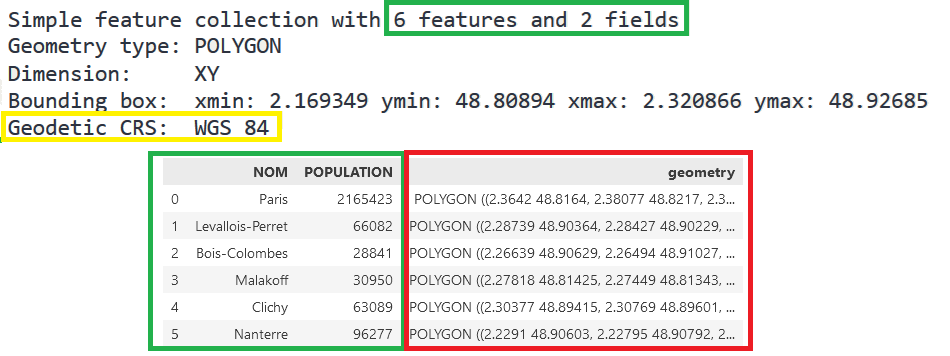

1.  Les **attributs**. Ce sont les valeurs associ√©es √† chaque niveau g√©ographique.
    Il s‚Äôagit de la dimension tabulaire usuelle, dont le traitement est similaire
    √† celui d‚Äôun objet `Pandas` classique.
2.  Les **g√©om√©tries**. Ce sont les valeurs num√©riques interpr√©t√©es pour repr√©senter la dimension g√©ographique. Elles permettent de repr√©senter dans un certain
    r√©f√©rentiel (le syst√®me de r√©f√©rence) la dimension g√©ographique.
3.  Le **syst√®me de r√©f√©rence**. Il s‚Äôagit du syst√®me permettant de transformer les positions sur
    le globe (3 dimensions avec une boule asym√©trique) en un plan en deux dimensions.
    Il en existe une multitude, identifiables √† partir d‚Äôun code EPSG (4326, 2154‚Ä¶).
    Leur manipulation est facilit√©e par `Geopandas` qui s‚Äôappuie sur `Shapely`, de la m√™me
    mani√®re que `Pandas` s‚Äôappuie sur `Numpy` ou `Arrow`.

# 3. Lire et enrichir des donn√©es spatiales

Dans le chapitre pr√©c√©dent, nous avons √©voqu√© les formats de donn√©es
plats comme le `CSV` ou les nouveaux formats comme `Parquet`. Ceux-ci
sont adapt√©s √† des donn√©es tabulaires.
Pour des donn√©es g√©ographiques,
qui stockent de l‚Äôinformation selon plusieurs dimensions (les attributs
et la g√©om√©trie), il existe des formats sp√©cialis√©s.

## 3.1 Le format *shapefile* (`.shp`) et le *geopackage* (`.gpkg`)

Le format historique de stockage de donn√©es spatiales est le *[shapefile](https://fr.wikipedia.org/wiki/Shapefile)*. Il s‚Äôagit d‚Äôun format propri√©taire, d√©velopp√© par ESRI, qui est n√©anmoins devenu une norme *de facto*. Dans ce format, la donn√©e est stock√©e dans plusieurs fichiers:

-   `data.shp` : contient les g√©om√©tries des entit√©s spatiales (points, lignes, polygones‚Ä¶).
-   `data.shx` : un index pour acc√©der rapidement aux g√©om√©tries stock√©es dans le fichier `.shp`.
-   `data.dbf` : une table attributaire au format dBase qui contient les informations descriptives des entit√©s spatiales.
-   `data.prj` : contient les informations de projection et de syst√®me de coordonn√©es (nous reviendrons sur ce concept ult√©rieurement).

Ce format pr√©sente plusieurs inconv√©nients. Tout d‚Äôabord il est assez volumineux ; certains formats modernes seront plus optimis√©s pour r√©duire la volum√©trie sur disque et le temps de chargement des donn√©es. Surtout, le probl√®me principal du *shapefile* est que pour lire les donn√©es de mani√®re int√®gre, il est n√©cessaire de partager de mani√®re syst√©matique ces quatre fichiers, sous peine d‚Äôintroduire un risque de corruption ou d‚Äôincompl√©tude de la donn√©e. En faisant `gpd.read_file("data.shp")`, `GeoPandas`
fait lui-m√™me le lien entre les observations et leur repr√©sentation spatiale qui sont pr√©sents dans plusieurs fichiers.

Le format `GeoPackage` est un h√©ritier spirituel du *shapefile* visant √† r√©soudre ces deux limites. Il s‚Äôagit d‚Äôun format libre recommand√© par l‚Äô*open geospatial consortium* (OGC). Les g√©omaticiens appr√©cient ce format, il s‚Äôagit d‚Äôailleurs du format par d√©faut de QGIS, le logiciel sp√©cialis√© pour les SIG. N√©anmoins, m√™me si `GeoPandas` fonctionne bien avec ce format, celui-ci est moins connu par les *data scientists* que le *shapefile* ou que le *geojson* que nous allons d√©crire par la suite.

## 3.2 Le GeoJSON et le TopoJSON

Le d√©veloppement d‚Äôun format concurrent l‚Äôh√©g√©monie du *shapefile* est intrins√®quement li√© √† l‚Äô√©mergence des technologies *web* dans le secteur de la cartographie. Ces technologies web s‚Äôappuient sur Javascript et reposent sur les standards du format JSON.

Le format *GeoJSON* stocke dans un seul fichier √† la fois les attributs et les g√©om√©tries. Il est donc assez pratique √† l‚Äôusage et s‚Äôest impos√© comme le format pr√©f√©r√© des d√©veloppeurs web. Le fait de stocker l‚Äôensemble de l‚Äôinformation dans un seul fichier peut cependant le rendre assez volumineux si les g√©om√©tries sont tr√®s pr√©cises, mais le volume reste moindre que celui du *shapefile*. `GeoPandas` est tr√®s bien fait pour lire des fichiers au format GeoJSON et les plateformes de partage de donn√©es, comme `data.gouv` privil√©gient ce format √† celui du *shapefile*.

Pour all√©ger le fichier, le format `TopoJSON` a r√©c√©mment √©merg√©. Celui-ci est construit selon les m√™mes principes que le `GeoJSON` mais r√©duit le volume de donn√©es g√©om√©triques stock√©es en ne conservant pas tous les points en appliquant une simplification pour ne conserver que les arcs et les directions entre ceux-ci. Ce format √©tant r√©cent, il n‚Äôest pas encore bien int√©gr√© √† l‚Äô√©cosyst√®me `Python`.

## 3.3 Les autres formats de donn√©es

L‚Äô√©cosyst√®me des formats de donn√©es g√©ographiques est bien plus √©clat√© que celui des donn√©es structur√©es. Chaque format pr√©sente des avantages qui le rendent int√©ressant pour un type de donn√©es mais des limites qui l‚Äôemp√™chent de devenir un standard pour d‚Äôautres types de donn√©es.

Par exemple, les donn√©es GPS extraites de diverses applications (par exemple `Strava`) sont stock√©es au format GPX. Ce dernier est particuli√®rement adapt√© pour des traces g√©olocalis√©es avec une altitude. Mais ce n‚Äôest pas le format le plus appropri√© pour stocker des lignes directionnelles, un pr√©requis indispensable pour les applications d‚Äôitin√©raires.

Les formats *shapefile* et *geojson* sont suffisamment mall√©ables pour s‚Äôadapter aux diff√©rents types de donn√©es g√©ographiques m√™me s‚Äôil ne s‚Äôagit
pas du format optimal pour tel ou tel type de donn√©es. Dans cette classe g√©n√©raliste de formats, le `Geoparquet` pourrait √™tre le prochain format √† la mode. Comme son nom l‚Äôindique, il s‚Äôagit d‚Äôune extension du format `Parquet` √† des donn√©es g√©ographiques. Ce format n‚Äôest pas encore m√ªr mais reste √† suivre, la masse d‚Äôutilisateurs de l‚Äô√©cosyst√®me `Parquet` pouvant amener √† un changement rapide si une impl√©mentation stable de `Geoparquet` √©merge.

Cette [page](https://si.ecrins-parcnational.com/blog/2020-02-geojson-shapefile-geopackage.html) compare plus en d√©tail les principes formats de donn√©es g√©ographiques.
L‚Äôaide de [`Geopandas`](https://geopandas.org/io.html) propose des bouts de code en fonction des diff√©rentes situations dans lesquelles on se trouve.

## 3.4 Exercice de d√©couverte

L‚Äôobjectif de cet exercice est d‚Äôillustrer la similarit√© des objets
`GeoPandas` avec les objets `Pandas` que nous avons d√©couverts pr√©c√©demment.

Nous allons importer directement les donn√©es `AdminExpress` (limites officielles des communes produites par l‚ÄôIGN) avec `cartiflette`:

> **Exercice 1: d√©couverte des objets g√©ographiques**
>
> En premier lieu, on r√©cup√®re des donn√©es g√©ographiques gr√¢ce
> au *package* `cartiflette` et √† sa fonction `carti_download`.
>
> 1.  Utiliser
>     le code sous cet exercice (celui utilisant `carti_download`) pour
>     t√©l√©charger les contours communaux
>     des d√©partements de la petite couronne (75, 92, 93 et 94)
>     de mani√®re simplifi√©e gr√¢ce au *package*
>     `cartiflette`
>
> 2.  Regarder les premi√®res lignes des donn√©es. Identifier la diff√©rence avec
>     un *dataframe* standard.
>
> 3.  Afficher le syst√®me de projection (attribut `crs`) de `communes_borders`. Ce dernier contr√¥le la
>     transformation de l‚Äôespace tridimensionnel terrestre en une surface plane.
>     Utiliser `to_crs` pour transformer les donn√©es en Lambert 93, le
>     syst√®me officiel (code EPSG 2154).
>
> 4.  Afficher les communes des Hauts de Seine (d√©partement 92) et utiliser la m√©thode
>     `plot`
>
> 5.  Ne conserver que Paris et r√©pr√©senter les fronti√®res sur une carte : quel est le probl√®me pour
>     une analyse de Paris intramuros?
>
> On remarque rapidement le probl√®me.
> On ne dispose ainsi pas des limites des arrondissements parisiens, ce
> qui appauvrit grandement la carte de Paris.
>
> 1.  Cette fois, utiliser l‚Äôargument `borders="COMMUNE_ARRONDISSEMENT"` pour obtenir
>     un fonds de carte consolid√© des communes avec les arrondissements dans les grandes villes.
>     Convertir en Lambert 93.

In [ ]:
# 1. Chargement des donn√©es de Cartiflette
from cartiflette import carti_download
communes_borders = carti_download(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE",
    vectorfile_format="geojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

La visualisation propos√©e √† la question permet de voir que notre *DataFrame* comporte la colonne *geometry* qui contient les informations n√©cessaires pour conna√Ætre les contours communaux.

In [ ]:
# Question 2
communes_borders.head()

In [ ]:
# Question 3
communes_borders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Les donn√©es sont en WGS84, on les reprojette en Lambert 93

A la question 5, on remarque facilement le probl√®me pour Paris: il manque les limites des arrondissements. Cela appauvrit grandement la carte de Paris.

A l‚Äôissue de la question 6, on obtient la carte attendue pour Paris intramuros:

In [ ]:
# 6. Chargement des donn√©es de Cartiflette
petite_couronne = carti_download(
    crs = 4326,
    values = ["75", "92", "93", "94"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="geojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)
    
petite_couronne.crs
petite_couronne = petite_couronne.to_crs(2154)
petite_couronne.crs

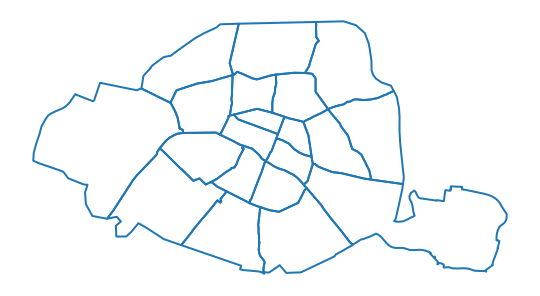

In [ ]:
ax = petite_couronne[petite_couronne['INSEE_DEP'] == "75"].boundary.plot()
ax.set_axis_off()

# 4. Le syst√®me de projection cartographique

## 4.1 Principe

Les donn√©es spatiales sont
plus riches que les donn√©es traditionnelles car elles
incluent, habituellement, des √©l√©ments suppl√©mentaires pour placer dans
un espace cart√©sien les objets. Cette dimension suppl√©mentaire peut √™tre simple
(un point comporte deux informations suppl√©mentaire: $x$ et $y$) ou
assez complexe (polygones, lignes avec direction, etc.).

L‚Äôanalyse cartographique emprunte d√®s lors √† la g√©om√©trie
des concepts
pour repr√©senter des objets dans l‚Äôespace. Les **projections**
sont au coeur de la gestion des donn√©es spatiales.
Ces derni√®res consistent √† transformer une position dans l‚Äôespace
terrestre √† une position sur un plan. Il s‚Äôagit donc d‚Äôune op√©ration
de projection d‚Äôun espace tri-dimensionnel dans un espace
√† deux dimensions.
Ce [post](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/geographic-vs-projected-coordinate-reference-systems-UTM/) propose de riches √©l√©ments sur le
sujet, notamment l‚Äôimage suivante qui montre bien le principe d‚Äôune projection :

<figure>
<img src="https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/spatial-projection-transformations-crs.png" alt="Les diff√©rents types de projection" />
<figcaption aria-hidden="true">Les diff√©rents types de projection</figcaption>
</figure>

Cette op√©ration n‚Äôest pas neutre. L‚Äôune des cons√©quences du
[th√©or√®me remarquable de Gauss](https://fr.wikipedia.org/wiki/Theorema_egregium)
est que la surface de la Terre ne peut √™tre cartographi√©e sans distortion.
Une projection ne peut simultan√©ment conserver intactes les distances et les
angles (i.e.¬†les positions).
Il n‚Äôexiste ainsi pas de projection universellement meilleure, ce qui ouvre
la porte √† la coexistence de nombreuses projections diff√©rentes, pens√©es
pour des t√¢ches diff√©rentes.
Un mauvais syst√®me de repr√©sentation
fausse l‚Äôappr√©ciation visuelle mais peut aussi entra√Æner des erreurs dans
les calculs sur la dimension spatiale.

**Les syst√®mes de projection font l‚Äôobjet de standards internationaux et sont souvent d√©sign√©s par des codes dits codes EPSG**. Ce [site](https://epsg.io/) est un bon aide-m√©moire. Les plus fr√©quents, pour les utilisateurs fran√ßais, sont les suivants (plus d‚Äôinfos [ici](https://geodesie.ign.fr/contenu/fichiers/documentation/SRCfrance.pdf)) :

-   `2154` : syst√®me de projection Lambert 93. Il s‚Äôagit du syst√®me de projection officiel. La plupart des donn√©es diffus√©es par l‚Äôadministration pour la m√©tropole sont disponibles dans ce syst√®me de projection.
-   `27572` : Lambert II √©tendu. Il s‚Äôagit de l‚Äôancien syst√®me de projection officiel. Les donn√©es spatiales anciennes peuvent √™tre dans ce format.
-   `4326` : WGS 84 ou syst√®me de pseudo-Mercator Ce n‚Äôest en r√©alit√© pas un syst√®me de projection mais un syst√®me de coordonn√©es (longitude / latitude) qui permet simplement un rep√©rage angulaire sur l‚Äôellipso√Øde. Il est utilis√© pour les donn√©es GPS. Il s‚Äôagit du syst√®me le plus
    usuel, notamment quand on travaille avec des fonds de carte *web*.

## 4.2 Le syst√®me Mercator

Comme √©voqu√© plus haut, l‚Äôune des projections les plus connues est la projection Web Mercator (code EPSG 3857), qui proj√®te sur les cartes planes les donn√©es sph√©riques de longitude, latitude issues du syst√®me WGS84 (EPSG 4326), qui est le syst√®me g√©od√©sique utilis√© par le [GNSS](https://en.wikipedia.org/wiki/Satellite_navigation) am√©ricain [**GPS**](https://en.wikipedia.org/wiki/Global_Positioning_System), utilis√© par l‚Äôimmense majorit√© des syst√®mes de navigation mondiaux, et a fortiori Google Maps. Il
s‚Äôagit d‚Äôune projection conservant intacte les angles, ce
qui implique qu‚Äôelle alt√®re les distances. Celle-ci a en effet √©t√©
pens√©e, √† l‚Äôorigine, pour repr√©senter l‚Äôh√©misph√®re Nord. Plus
on s‚Äô√©loigne de celui-ci, plus les distances sont distordues. Cela
am√®ne √† des distorsions bien
connues (le Groenland hypertrophi√©, l‚ÄôAfrique de taille r√©duite, l‚ÄôAntarctique d√©mesur√©‚Ä¶).
En revanche, la projection Mercator conserve intacte les positions.
C‚Äôest cette propri√©t√© qui explique son utilisation dans les syst√®mes
GPS et ainsi dans les fonds de carte de navigation du type *Google Maps*.
Il s‚Äôagit d‚Äôune projection pens√©e d‚Äôabord pour la navigation, non pour la repr√©sentation d‚Äôinformations socio√©conomiques sur la terre. Cette projection est indissociable des grandes explorations de la Renaissance, comme le rappelle [ce fil](https://x.com/JulesGrandin/status/1765668642094514447) sur Twitter de Jules Grandin.

<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/truesize.png" alt="Exemple de reprojection de pays depuis le site thetruesize.com" />
<figcaption aria-hidden="true"><em>Exemple de reprojection de pays depuis le site <a href="https://thetruesize.com/">thetruesize.com</a></em></figcaption>
</figure>

<figure id="fig-mercator-funny">
<img src="https://rgeo.linogaliana.fr/exercises/img/mercator.jpg" />
<figcaption>Figure¬†4.1: ‚ÄúDon‚Äôt trust the Mercator projection‚Äù sur <code>Reddit</code></figcaption>
</figure>

Pour aller plus loin, la carte interactive
suivante, construite par Nicolas Lambert, issue de
ce [*notebook* `Observable`](https://observablehq.com/@neocartocnrs/impact-of-projections-on-areas), illustre l‚Äôeffet
d√©formant de la projection Mercator, et de quelques-unes autres,
sur notre perception de la taille des pays.

Il existe en fait de nombreuses repr√©sentations possibles du monde, plus ou moins
alambiqu√©es. Les projections sont tr√®s nombreuses et certaines peuvent avoir une [forme suprenante](https://imgs.xkcd.com/comics/map_projections.png).
Par exemple,
la [projection de Spillhaus](https://storymaps.arcgis.com/stories/756bcae18d304a1eac140f19f4d5cb3d)
propose de centrer la vue sur les oc√©ans et non une terre. C‚Äôest pour
cette raison qu‚Äôon parle parfois de monde tel que vu par les poissons
√† son propos.

> **Astuce pour la France**
>
> Pour la France, dans le syst√®me WGS84 (4326) :
>
> -   Longitude ($x$) tourne autour de 0¬∞ (de -5.2 √† +9.6 pour √™tre plus pr√©cis)
> -   La latitude ($y$) autour de 45 (entre +41.3 √† +51.1)
>
> Dans le syst√®me Lambert 93 (2154) :
>
> -   Coordonn√©es $x$: entre 100 000 et 1 300 000
> -   La latitude ($y$): entre 6 000 000 et 7 200 000
>
> [Plus de d√©tails](https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f)

## 4.3 Gestion avec `GeoPandas`

Concernant la gestion des projections avec `GeoPandas`,
la [documentation officielle](https://geopandas.org/projections.html) est tr√®s bien
faite. Elle fournit notamment l‚Äôavertissement suivant qu‚Äôil est
bon d‚Äôavoir en t√™te :

> Be aware that most of the time you don‚Äôt have to set a projection. Data loaded from a reputable source (using the geopandas.read_file() command) should always include projection information. You can see an objects current CRS through the GeoSeries.crs attribute.
>
> From time to time, however, you may get data that does not include a projection. In this situation, you have to set the CRS so geopandas knows how to interpret the coordinates.

<figure>
<img src="https://imgs.xkcd.com/comics/bad_map_projection_south_america.png" alt="Image emprunt√©e √† XKCD https://xkcd.com/2256/ qu‚Äôon peut √©galement trouver sur https://blog.chrislansdown.com/2020/01/17/a-great-map-projection-joke/" />
<figcaption aria-hidden="true"><em>Image emprunt√©e √† XKCD <a href="https://xkcd.com/2256/" class="uri">https://xkcd.com/2256/</a> qu‚Äôon peut √©galement trouver sur <a href="https://blog.chrislansdown.com/2020/01/17/a-great-map-projection-joke/" class="uri">https://blog.chrislansdown.com/2020/01/17/a-great-map-projection-joke/</a></em></figcaption>
</figure>

Les deux principales m√©thodes pour d√©finir le syst√®me de projection utilis√© sont :

-   **`df.set_crs`** : cette commande sert √† pr√©ciser quel est le syst√®me de projection utilis√©, c‚Äôest-√†-dire comment les coordonn√©es *(x,y)* sont reli√©es √† la surface terrestre. **Cette commande ne doit pas √™tre utilis√©e pour transformer le syst√®me de coordonn√©es, seulement pour le d√©finir**.
-   **`df.to_crs`** : **cette commande sert √† projeter les points d‚Äôune g√©om√©trie dans une autre, c‚Äôest-√†-dire √† recalculer les coordonn√©es selon un autre syst√®me de projection.**

Dans le cas particulier de production de carte avec un fond `OpenStreetMaps` ou une carte dynamique `leaflet`, il est n√©cessaire de d√©-projeter les donn√©es (par exemple √† partir du Lambert-93) pour atterrir dans le syst√®me non-projet√© WGS 84 (code EPSG 4326). Ce site [d√©di√© aux projections g√©ographiques](https://epsg.io/) peut √™tre utile pour retrouver le syst√®me de projection d‚Äôun fichier o√π il n‚Äôest pas indiqu√©.

Le prochain exercice permettra, avec quelques cas pathologiques, de se convaincre de l‚Äôimportance de d√©l√©guer le plus possible la gestion du syst√®me de projection √† `GeoPandas`. La question n‚Äôest pas que sur la pertinence de la repr√©sentation des objets g√©ographiques sur la carte. En effet, l‚Äôensemble des op√©rations g√©om√©triques (calculs d‚Äôaires, de distance, etc.) peut √™tre affect√© par les choix faits sur le syst√®me de projection.

## 4.4 Exercice pour comprendre l‚Äôimportance du syst√®me de projection

Voici un code utilisant encore
`cartiflette`
pour r√©cup√©rer les fronti√®res fran√ßaises (d√©coup√©es par r√©gion):

In [ ]:
from cartiflette import carti_download
france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

> **Exercice 2 : Les projections, repr√©sentations et approximations**
>
> 1.  S‚Äôamuser √† repr√©senter les limites de la France avec plusieurs projections:
>
> -   Mercator WGS84 (EPSG: 4326)
> -   Projection healpix (`+proj=healpix +lon_0=0 +a=1`)
> -   Projection pr√©vue pour Tahiti (EPSG: 3304)
> -   Projection Albers pr√©vue pour Etats-Unis (EPSG: 5070)
>
> 1.  Calculer la superficie en $km^2$
>     des r√©gions fran√ßaises dans les deux syst√®mes de projection suivants :
>     World Mercator WGS84 (EPSG: 3395) et Lambert 93 (EPSG: 2154). Calculer la diff√©rence en $km^2$
>     pour chaque r√©gion.

In [ ]:
# Question 1
france_2154 = france.to_crs(2154)
france_healpix = france.to_crs("+proj=healpix +lon_0=0 +a=1")
france_5070 = france.to_crs(5070)
france_3304 = france.to_crs(3304)

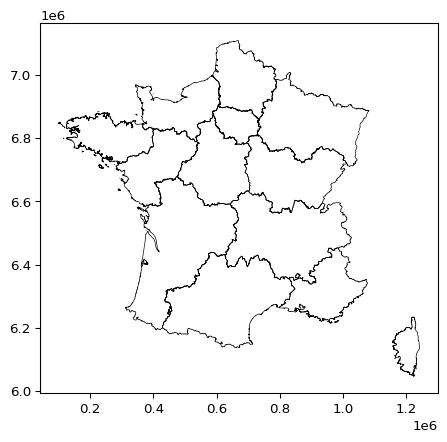

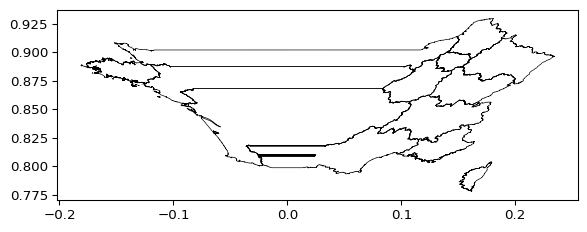

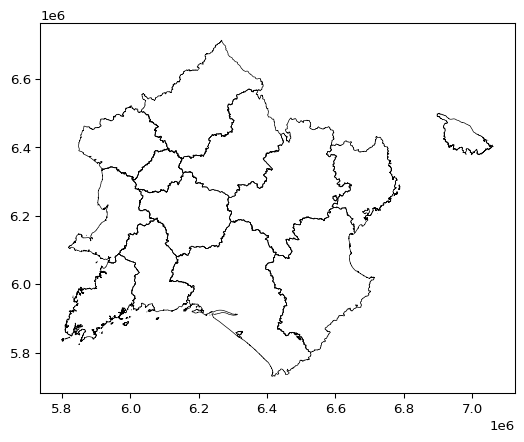

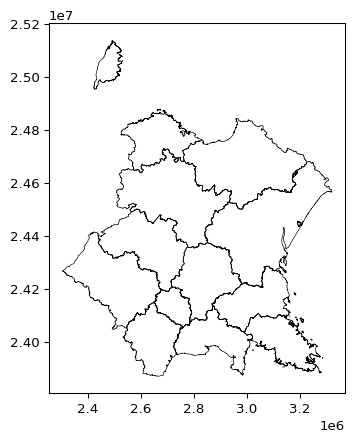

In [ ]:
ax1 = france_2154.boundary.plot(edgecolor = "k", linewidth=0.5)
ax2 = france_healpix.boundary.plot(edgecolor = "k", linewidth=0.5)
ax3 = france_5070.boundary.plot(edgecolor = "k", linewidth=0.5)
ax4 = france_3304.boundary.plot(edgecolor = "k", linewidth=0.5)

In [ ]:
# Question 2
france = france.to_crs(3395)
france["superficie_4326"] = france.area
france = france.to_crs(2154)
france["superficie_2154"] = france.area
france["mismatch"] = france['superficie_2154']-france['superficie_4326']

Avec la question 1 illustrant quelques cas pathologiques,
on comprend que les projections ont un effet d√©formant
qui se voit bien lorsqu‚Äôon les repr√©sente c√¥te √† c√¥te sous
forme de cartes :

``` python
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()
```

Figure¬†4.2: Comparaison des projections

Cependant le probl√®me n‚Äôest pas que visuel, il est √©galement
num√©rique. Les calculs g√©om√©triques am√®nent √† des diff√©rences
assez notables selon le syst√®me de r√©f√©rence utilis√©.

On peut repr√©senter ces approximations sur une carte[1] pour se faire une id√©e des r√©gions o√π l‚Äôerreur de mesure est la plus importante (objet de la question 2).

[1] This map is not too neat; it‚Äôs normal. We will see how to make beautiful maps later.

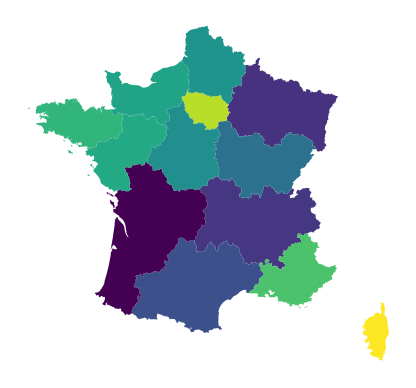

In [ ]:
ax = france.plot(column = "mismatch")
ax.set_axis_off()

Ce type d‚Äôerreur de mesure est normal √† l‚Äô√©chelle du territoire fran√ßais.
Les projections h√©rit√®res du Mercator d√©forment les distances,
surtout lorsqu‚Äôon se rapproche de l‚Äô√©quateur ou des p√¥les.

Il faut donc syst√©matiquement
repasser les donn√©es dans le syst√®me de projection Lambert 93 (le
syst√®me officiel pour la m√©tropole) avant d‚Äôeffectuer des calculs g√©om√©triques.

# 5. Importer et explorer les jeux de donn√©es spatiaux

Souvent, le d√©coupage communal ne sert qu‚Äôen fond de cartes, pour donner des
rep√®res. En g√©n√©ral, il sert donc √† contextualiser un autre jeu de donn√©es.

Pour illustrer cette approche, on va partir des donn√©es de localisation et de capacit√©s des
stations velib,
disponibles [sur le site d‚Äôopen data de la ville de Paris](https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/table/) et
requ√™tables directement par l‚Äôurl
<https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr>. Ce jeu de donn√©es nous permettra d‚Äôillustrer quelques enjeux classiques de l‚Äôanalyse de donn√©es spatiales

In [ ]:
velib_data = 'https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr'
stations = gpd.read_file(velib_data)
stations.head(2)

Skipping field coordonnees_geo: unsupported OGR type: 3

## 5.1 Localiser les donn√©es sur une carte

La premi√®re √©tape, avant l‚Äôexploration approfondie des donn√©es, consiste √† afficher celles-ci sur une carte contextuelle, afin de s‚Äôassurer de l‚Äôemprise g√©ographique des donn√©es.
Dans notre cas, cela nous donnera une intuition sur la localisation des stations et notamment la densit√© h√©t√©rog√®ne de celles-ci dans l‚Äôespace urbain parisien.

## 5.2 Exercice d‚Äôapplication

Dans le prochain exercice, nous proposons de cr√©er rapidement une
carte comprenant trois couches :

-   Les localisations de stations sous forme de points ;
-   Les bordures des communes et arrondissements pour contextualiser ;
-   Les bordures des d√©partements en traits plus larges pour contextualiser √©galement.

Nous irons plus loin dans le travail cartographique dans le prochain
chapitre. Mais √™tre en mesure de positionner rapidement
ses donn√©es sur une carte est
toujours utile dans un travail exploratoire.

En amont de l‚Äôexercice,
utiliser la fonction suivante du *package* `cartiflette` pour r√©cup√©rer
le fonds de carte des d√©partements de la petite couronne:

In [ ]:
idf = carti_download(
      values = ["11"],
      crs = 4326,
      borders = "DEPARTEMENT",
      vectorfile_format="geojson",
      filter_by="REGION",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)

petite_couronne_departements = (
  idf
  .loc[idf['INSEE_DEP'].isin(["75","92","93","94"])]
  .to_crs(2154)
)

> **Exercice 3: importer et explorer les donn√©es velib**
>
> On commence par r√©cup√©rer les donn√©es n√©cessaires √† la production
> de cette carte.
>
> 1.  V√©rifier la projection g√©ographique de `station` (attribut `crs`). Si celle-ci est diff√©rente des donn√©es communales, reprojeter ces
>     derni√®res dans le m√™me syst√®me de projection que les stations de v√©lib
> 2.  Ne conserver que les 50 principales stations (variable `capacity`)
>
> On peut maintenant construire la carte de mani√®re s√©quentielle avec la m√©thode `plot` en s‚Äôaidant de [cette documentation](https://geopandas.org/en/stable/docs/user_guide/mapping.html#maps-with-layers)
>
> 1.  En premier lieu, gr√¢ce √† `boundary.plot`,
>     repr√©senter la couche de base des limites des communes et arrondissements:
>
>     -   Utiliser les options `edgecolor = "black"` et `linewidth = 0.5`
>     -   Nommer cet objet `base`
>
> 2.  Ajouter la couche des d√©partements avec les options `edgecolor = "blue"` et `linewidth = 0.7`
>
> 3.  Ajouter les positions des stations
>     et ajuster la taille en fonction de la variable `capacity`. L‚Äôesth√©tique des points obtenus peut √™tre contr√¥l√© gr√¢ce aux options `color = "red"` et `alpha = 0.4`.
>
> 4.  Retirer les axes et ajouter un titre avec les options ci-dessous:
>
> ``` python
> base.set_axis_off()
> base.set_title("Les 50 principales stations de V√©lib")
> ```
>
> 1.  En suivant le mod√®le suivant, gr√¢ce au *package* `contextily`, ajouter un fond de carte contextuel *openstreetmap*
>
> ``` python
> import contextily as ctx
> ax = ...
> ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
> ```
>
> ‚ö†Ô∏è `contextily` attend des donn√©es dans le syst√®me de repr√©sentation *Pseudo Mercator* ([EPSG: 3857](https://epsg.io/3857)), il sera donc n√©cessaire de reprojeter vos donn√©es avant de r√©aliser la carte.

In [ ]:
# Question 1
stations.crs
stations = stations.to_crs(petite_couronne.crs) 

In [ ]:
# Question 2
principales_stations = stations.sort_values("capacity", ascending = False).head(50)

La couche de base obtenue √† l‚Äôissue de la question 3

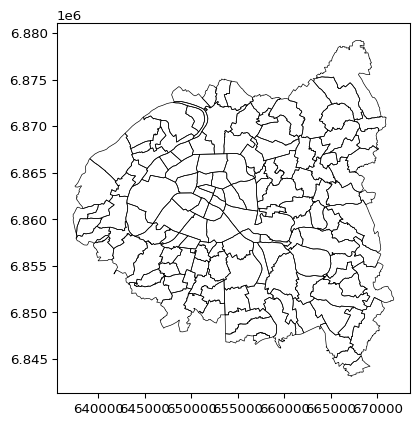

In [ ]:
# Question 3
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
base

Puis en y ajoutant les limites d√©partementales (question 4).

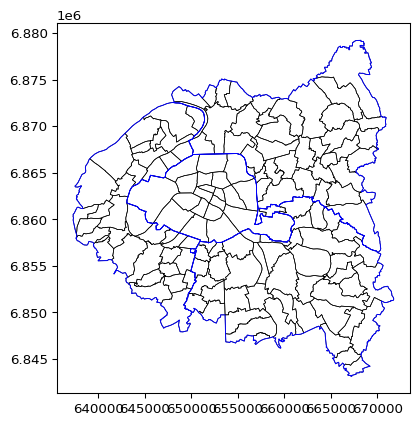

In [ ]:
# Question 4
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
petite_couronne_departements.boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
base

Puis les stations (question 5).

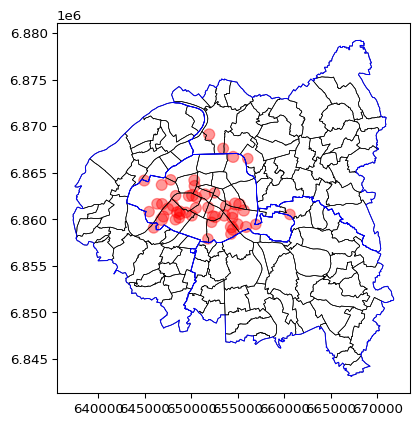

In [ ]:
# Question 5
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
petite_couronne_departements.boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
principales_stations.plot(ax= base, markersize = "capacity", color = "red", alpha = 0.4)
base

Ensuite, si on retire les axes (question 6), on obtient:

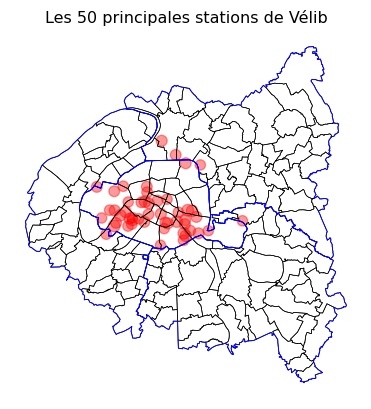

In [ ]:
# Question 6
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
petite_couronne_departements.boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
principales_stations.plot(ax= base, markersize = "capacity", color = "red", alpha = 0.4)
base.set_axis_off()
base.set_title("Les 50 principales stations de V√©lib")
base

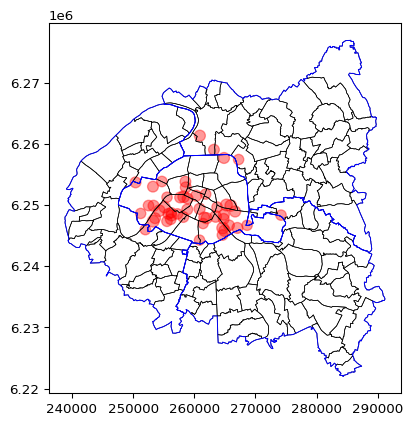

In [ ]:
# Question 7
import contextily as ctx
base = (
  petite_couronne.
  to_crs(3857)
  .boundary.plot(edgecolor = "black", linewidth = 0.5)
)
(
  petite_couronne_departements
  .to_crs(3857)
  .boundary.plot(ax = base, edgecolor = "blue", linewidth = 0.7)
)
(
  principales_stations
  .to_crs(3857)
  .plot(ax= base, markersize = "capacity", color = "red", alpha = 0.4)
)

La carte est d√©j√† parlante en soi. N√©anmoins, pour des personnes moins famili√®res de la g√©ographie parisienne, elle pourrait √™tre encore plus limpide avec l‚Äôajout d‚Äôun fond de carte contextuel *openstreetmap*. *In fine*, cela donne la carte suivante:

In [ ]:
base.set_axis_off()
base.set_title("Les 50 principales stations de V√©lib")
ctx.add_basemap(base, source = ctx.providers.OpenStreetMap.Mapnik)
base

<Axes: title={'center': 'Les 50 principales stations de V√©lib'}>

<Figure size 672x480 with 0 Axes>

## 5.3 Op√©rations sur les g√©om√©tries

Outre la repr√©sentation graphique simplifi√©e,
l‚Äôint√©r√™t principal d‚Äôutiliser
`GeoPandas` est l‚Äôexistence de m√©thodes efficaces pour
manipuler la dimension spatiale. Un certain nombre proviennent du
package
[`Shapely`](https://shapely.readthedocs.io/en/latest/manual.html#general-attributes-and-methods).

Nous avons d√©j√† vu la m√©thode `to_crs` pour reprojeter les donn√©es de mani√®re vectoris√©e sans avoir √† s‚Äôinqui√©ter.
Nous avons √©galement √©voqu√© la m√©thode `area`
pour calculer des surfaces. Il en existe de nombreuses et l‚Äôobjectif de ce chapitre n‚Äôest pas d‚Äô√™tre exhaustif sur le sujet mais plut√¥t de servir d‚Äôintroduction g√©n√©rale pour amener √† approfondir ult√©rieurement.
Parmi les m√©thodes les plus utiles, on peut citer `centroid` qui, comme son nom l‚Äôindique,
recherche le centro√Øde de chaque polygone et transforme ainsi des donn√©es
surfaciques en donn√©es ponctuelles. Par exemple, pour
repr√©senter approximativement les centres des villages de la
Haute-Garonne (31), apr√®s avoir t√©l√©charg√© le fonds de carte adapt√©, on
fera

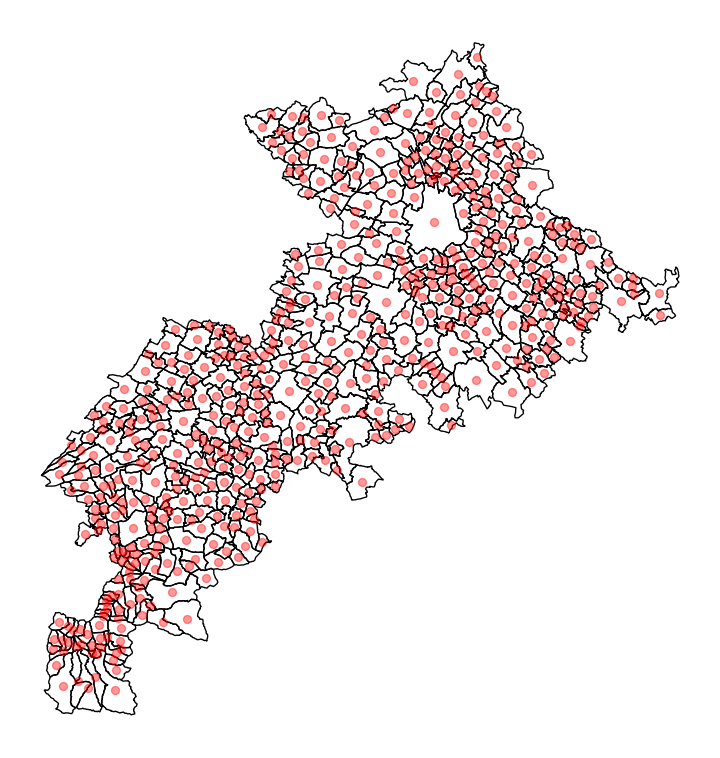

In [ ]:
from cartiflette import carti_download
communes_31 = carti_download(
      values = ["31"],
      crs = 4326,
      borders="COMMUNE",
      vectorfile_format="geojson",
      filter_by="DEPARTEMENT",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)

# on reprojete en 3857 pour le fond de carte
communes_31 = communes_31.to_crs(3857)

# on calcule le centroide
dep_31 = communes_31.copy()
communes_31['geometry'] = communes_31['geometry'].centroid

ax = communes_31.plot(figsize = (10,10), color = 'red', alpha = 0.4, zorder=2)
dep_31.to_crs(3857).plot(
  ax = ax, zorder=1,
  edgecolor = "black",
  facecolor="none", color = None
)
#ctx.add_basemap(ax, source = ctx.providers.Stamen.Toner)
ax.set_axis_off()
ax

Par cons√©quent, avec `Geopandas`, l‚Äôensemble de la grammaire `Pandas` peut √™tre mobilis√©e pour traiter la dimension attributaire des donn√©es alors que la dimension g√©ographique pourra √™tre manipul√©e avec des m√©thodes adapt√©es.

# 6. Enrichissements gr√¢ce √† la dimension spatiale: les jointures spatiales

## 6.1 Principe

La carte pr√©c√©dente illustre d√©j√† la puissance de la repr√©sentation cartographique. En quelques lignes de code, avec tr√®s peu d‚Äôop√©rations sur nos donn√©es, on comprend d√©j√† mieux le ph√©nom√®ne qu‚Äôon d√©sire observer. En l‚Äôoccurrence, on d√©tecte tr√®s clairement une structure centre-p√©riph√©rie dans nos donn√©es, ce qui n‚Äôest pas surprenant mais qu‚Äôil est rassurant de retrouver au premier abord.

On remarque √©galement que les stations les plus utilis√©es, √† l‚Äôext√©rieur de l‚Äôhypercentre parisien, sont g√©n√©ralement situ√©es sur les grands axes ou √† proximit√© des parcs. L√† encore, rien de surprenant mais il est rassurant de retrouver ceci dans nos donn√©es.

On peut maintenant explorer de mani√®re plus approfondie la structure de notre jeu de donn√©es. Cependant si on observe celui-ci, on remarque qu‚Äôon a peu d‚Äôinformations dans le jeu de donn√©es brutes

In [ ]:
stations.head(2)

Dans le chapitre pr√©c√©dent, nous avons pr√©sent√© la mani√®re dont l‚Äôassociation de jeux de donn√©es par une dimension commune permet d‚Äôaccro√Ætre la valeur de celles-ci. En l‚Äôoccurrence, il s‚Äôagissait d‚Äôappariements de donn√©es sur la base d‚Äôinformations communes dans les deux jeux de donn√©es.

Nous avons maintenant une information suppl√©mentaire implicite dans nos deux de donn√©es: la dimension g√©ographique. On parle de jointure spatiale pour d√©signer l‚Äôassociation de jeux de donn√©es sur la dimension g√©ographique. Il existe de nombreux types diff√©rents de jointures spatiales: trouver des points dans un polygone, trouver l‚Äôintersection entre plusieurs aires, relier un point √† son plus proche voisin dans une autre source, etc.

## 6.2 Exemple: localiser les stations dans leur arrondissement

Dans cet exercice, on va supposer que :

-   les localisations des stations `velib`
    sont stock√©es dans un *dataframe* nomm√© `stations`
-   les donn√©es administratives
    sont dans un *dataframe* nomm√© `petite_couronne`.

> **Exercice 4: Associer les stations aux communes et arrondissements auxquels elles appartiennent**
>
> 1.  Faire une jointure spatiale pour enrichir les donn√©es de stations en y ajoutant des informations de `petite_couronne`. Appeler cet objet `stations_info`.
> 2.  Compter le nombre de stations et la taille m√©diane des stations par arrondissements
> 3.  Cr√©er les objets `stations_19e` et `arrondissement_19e` pour stocker, respectivement,
>     les stations appartenant au 19e et les limites de l‚Äôarrondissement.
> 4.  Compter le nombre de stations velib et le nombre de places velib par arrondissement ou commune. Repr√©senter sur une carte chacune des informations
> 5.  Repr√©senter la carte des stations du 19e arrondissement avec le code suivant :
>
> ``` python
> base = petite_couronne.loc[petite_couronne['INSEE_DEP']=="75"].boundary.plot(edgecolor = "k", linewidth=0.5)
> arrondissement_19e.boundary.plot(ax = base, edgecolor = "red", linewidth=0.9)
> stations_19.plot(ax = base, color = "red", alpha = 0.4)
> base.set_axis_off()
> base.set_title("Les stations V√©lib du 19e arrondissement")
> base
> ```
>
> En reprenant les exemples pr√©c√©dents, ne repr√©senter que le 19e et ajouter un fond de carte *openstreetmap* pour mieux localiser les stations.
>
> 1.  Repr√©senter les m√™mes informations mais en densit√© (diviser par la surface de l‚Äôarrondissement ou commune en km2)

In [ ]:
# Question 1
stations_info = gpd.sjoin(stations, petite_couronne, predicate = 'within')

A l‚Äôissue de la jointure spatiale, le jeu de donn√©es pr√©sente la structure suivante

In [ ]:
stations_info.head(2)

2 rows √ó 31 columns

On peut donc calculer des statistiques par arrondissement, comme on le ferait avec un `DataFrame Pandas` (question 2):

In [ ]:
# Question 2
stations_info.groupby("NOM").agg({"capacity": ['count', 'median']}).reset_index().sort_values(('capacity', 'count'), ascending = True)

84 rows √ó 3 columns

In [ ]:
# Question 3
stations_19 = stations_info.loc[stations_info['NOM'].str.contains("19e")]
arrondissement_19e = petite_couronne.loc[petite_couronne['NOM'].str.contains("19e")]

N√©anmoins des cartes seront sans doute plus parlante. Pour commencer, avec la question 3, on peut repr√©senter les stations du 19e arrondissement, d‚Äôabord dans l‚Äôensemble de Paris.

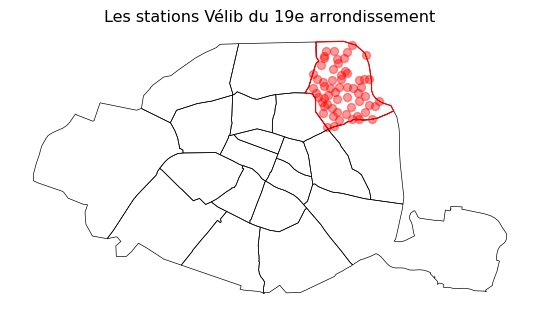

In [ ]:
# Question 4a
base = petite_couronne.loc[petite_couronne['INSEE_DEP']=="75"].boundary.plot(edgecolor = "k", linewidth=0.5)
arrondissement_19e.boundary.plot(ax = base, edgecolor = "red", linewidth=0.9)
stations_19.plot(ax = base, color = "red", alpha = 0.4)
base.set_axis_off()
base.set_title("Les stations V√©lib du 19e arrondissement")
base

On peut ensuite zoomer sur cet arrondissement et faire une carte avec un fond plus travaill√©:

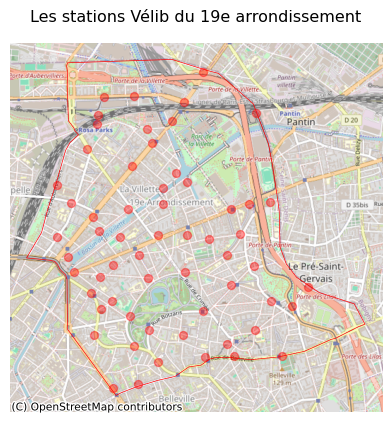

In [ ]:
# Question 4b
base = (
  arrondissement_19e
  .loc[petite_couronne['INSEE_DEP']=="75"]
  .to_crs(3857)
  .boundary.plot(edgecolor = "red", linewidth=0.5)
)
(
  stations_19
  .to_crs(3857)
  .plot(ax = base, color = "red", alpha = 0.4)
)
base.set_axis_off()
base.set_title("Les stations V√©lib du 19e arrondissement")
ctx.add_basemap(base, source = ctx.providers.OpenStreetMap.Mapnik)
base

Carte obtenue √† la question 5 :

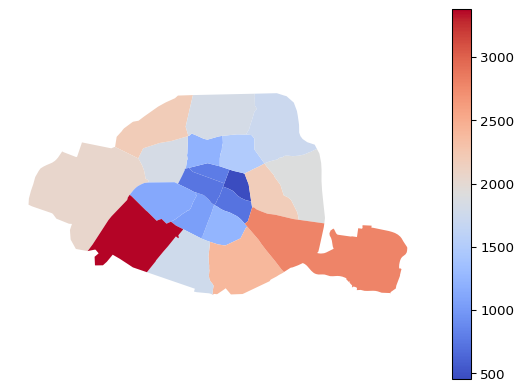

In [ ]:
# Question 5
stations_agg = (
  stations_info
  .groupby("INSEE_COG")
  .agg({"stationcode": "nunique", "capacity": "sum"})
  .reset_index()
)

petite_couronne_count = petite_couronne.merge(
  stations_agg
).to_crs(2154)

petite_couronne_count = petite_couronne_count.loc[petite_couronne_count["INSEE_DEP"]== "75"]
aplat = petite_couronne_count.plot(
    column = "capacity", cmap="coolwarm", legend=True)
aplat.set_axis_off()
aplat

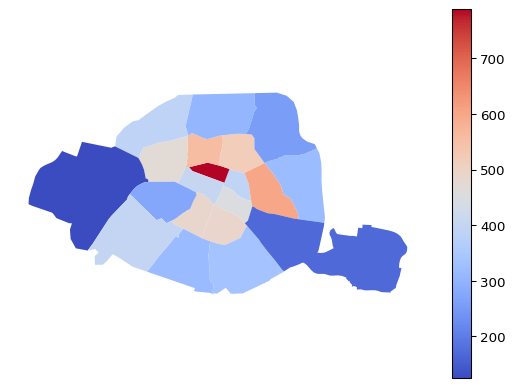

In [ ]:
# Question 6
petite_couronne_count['area'] = petite_couronne_count.area
petite_couronne_count['area'] = petite_couronne_count['area'].div(1e6)
petite_couronne_count['density'] = petite_couronne_count['capacity']/petite_couronne_count['area']

aplatq6 = petite_couronne_count.plot(
    column = "density", cmap="coolwarm", legend=True)
aplatq6.set_axis_off()
aplatq6

Avec cette carte, bas√©e sur des aplats de couleurs (*choropleth map*), le lecteur est victime d‚Äôune illusion classique. Les arrondissements les plus visibles sur la carte sont les plus grands. D‚Äôailleurs c‚Äôest assez logique qu‚Äôils soient √©galement mieux pourvus en velib. M√™me si l‚Äôoffre de velib est probablement plus reli√©e √† la densit√© de population et d‚Äô√©quipements, on peut penser que l‚Äôeffet taille joue et que celui-ci est certainement le ph√©nom√®ne le plus visible sur notre carte alors qu‚Äôil ne s‚Äôagit peut-√™tre pas du facteur de premier ordre en r√©alit√©.

Si on repr√©sente plut√¥t la capacit√© sous forme de densit√©, pour tenir compte de la taille diff√©rente des arrondissements, les conclusions sont invers√©es et correspondent mieux aux attentes d‚Äôun mod√®le centre-p√©riph√©rie. Les arrondissements centraux sont mieux pourvus. Si nous faisions une carte avec des ronds proportionnels plut√¥t qu‚Äôune carte chorol√®pthe, cela serait encore plus visible ; n√©anmoins la cartographie n‚Äôest pas l‚Äôobjet de ce chapitre.

In [ ]:
aplatq6

<Axes: >

## 6.3 Exercice suppl√©mentaire

Les exercices pr√©c√©dents ont permis de se familiariser au traitement de donn√©es
spatiales. N√©anmoins il arrive fr√©quemment de devoir jongler de mani√®re plus ardue avec la
dimension g√©om√©trique. Il peut s‚Äôagir, par exemple, de changer d‚Äô√©chelle territoriale dans les donn√©es ou d‚Äôintroduire
des fusions/dissolutions de g√©om√©tries.

Nous allons illustrer cela avec un exercice suppl√©mentaire illustrant, en pratique, comment travailler des donn√©es dans les mod√®les d‚Äô√©conomie urbaine o√π on fait l‚Äôhypoth√®se de d√©placements au plus proche point ([mod√®le d‚ÄôHotelling](https://fr.wikipedia.org/wiki/Loi_de_Hotelling)).

Imaginons que chaque utilisateur de velib se d√©place exclusivement
vers la station la plus proche (√† supposer qu‚Äôil n‚Äôy a jamais p√©nurie
ou surcapacit√©). Quelle est la carte de la couverture des v√©libs ?
Pour r√©pondre √† ce type de question, on utilise fr√©quemment la
la [tesselation de Vorono√Ø](https://fr.wikipedia.org/wiki/Diagramme_de_Vorono%C3%AF),
une op√©ration classique pour transformer des points en polygones.

L‚Äôexercice suivant
permet de se familiariser avec la construction de *voronoi* [1].

> **Exercice 5 (optionnel): La carte de couverture des stations**
>
> Cet exercice est plus complexe parce qu‚Äôil implique de revenir √† `Shapely`, une librairie plus bas niveau que `GeoPandas`.
>
> Cet exercice est laiss√© libre. Une source d‚Äôinspiration possible est cette discussion sur [StackExchange](https://gis.stackexchange.com/questions/337561/making-polygon-for-every-point-in-set-using-voronoi-diagram).
>
> L‚Äôobjectif est de faire deux cartes de couverture: une au niveau de la petite couronne et l‚Äôautre seulement au sein de Paris intramuros.

[1] In [this working paper](https://www.insee.fr/en/statistiques/4925202) on mobile phone data, it is shown that this approach is not without bias in phenomena where the spatial proximity hypothesis is overly simplistic.

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import numpy as np
import shapely
from shapely.geometry import Polygon, MultiPolygon, Point
from shapely.ops import unary_union
import geopandas as gpd

# Step 2: Extract the coordinates for Voronoi tessellation
points = np.array([[geom.x, geom.y] for geom in stations_info.geometry])

# Step 3: Create the Voronoi tessellation
vor = Voronoi(points)

lines = [shapely.geometry.LineString(vor.vertices[line]) for line in
    vor.ridge_vertices if -1 not in line]
polys = shapely.ops.polygonize(lines)
voronoi_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(polys), crs=stations_info.crs)
masked_voronoi = gpd.overlay(voronoi_gdf, petite_couronne, how='intersection')

La premi√®re carte de couverture, au niveau de l‚Äôagglom√©ration dans son ensemble,
permet de voir la densit√© plus importante des
stations velib dans le centre parisien:

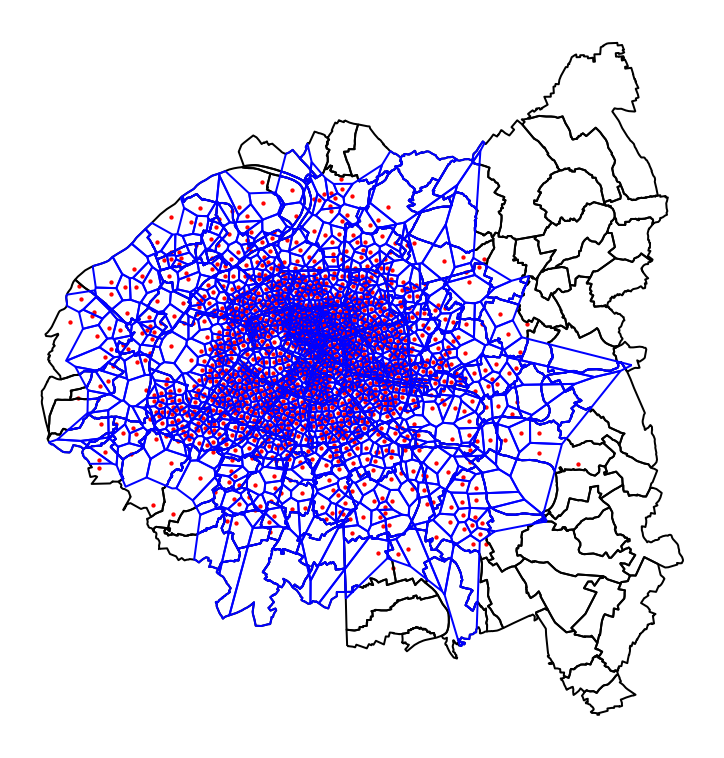

In [ ]:
base = petite_couronne.boundary.plot(figsize = (10,10), color='black')
stations_info.plot(ax=base, color='red', markersize=5)
masked_voronoi.boundary.plot(ax=base, color='blue')
base.set_axis_off()

Si on zoome sur Paris intramuros, on a √©galement une h√©t√©rog√©n√©it√© dans la couverture.
On a moins d‚Äôh√©t√©rog√©n√©it√© dans les surfaces de couverture puisque la densit√© est importante mais on remarque n√©anmoins des divergences entre certains espaces.

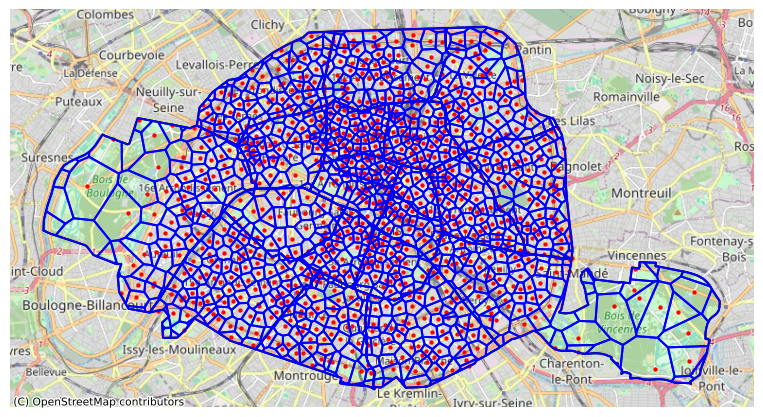

In [ ]:
base = (
  petite_couronne
  .loc[petite_couronne["INSEE_DEP"] == "75"]
  .to_crs(3857)
  .boundary.plot(figsize = (10,10), color='black')
)
(
  stations_info
  .loc[stations_info["INSEE_DEP"] == "75"]
  .to_crs(3857)
  .plot(ax=base, color='red', markersize=5)
)
(
  masked_voronoi
    .loc[masked_voronoi["INSEE_DEP"] == "75"]
    .to_crs(3857)
    .boundary.plot(ax=base, color='blue')
)
ctx.add_basemap(base, source = ctx.providers.OpenStreetMap.Mapnik)
base.set_axis_off()

# 7. R√©f√©rences

# 8. References

Chen, Chun-houh, Wolfgang H√§rdle, Antony Unwin, et Michael Friendly. 2008. ¬´¬†A brief history of data visualization¬†¬ª. *Handbook of data visualization*, 15‚Äë56.